In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
fulfilment_center = pd.read_csv('./fulfilment_center_info.csv')
meal_info = pd.read_csv('./meal_info.csv')
sample_submission=pd.read_csv('./sample_submission.csv')

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
train.shape

(456548, 9)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [6]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
test.shape

(32573, 8)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [9]:
sample_submission.head()

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0


In [10]:
sample_submission['num_orders'].value_counts()

0    32573
Name: num_orders, dtype: int64

In [11]:
fulfilment_center

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [12]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [13]:
meal_info.shape

(51, 3)

In [14]:
meal_info['category'].value_counts()

Beverages       12
Extras           3
Soup             3
Other Snacks     3
Salad            3
Rice Bowl        3
Starters         3
Sandwich         3
Pasta            3
Desert           3
Biryani          3
Pizza            3
Fish             3
Seafood          3
Name: category, dtype: int64

In [15]:
train = pd.merge(train,fulfilment_center, on='center_id')
train = pd.merge(train,meal_info, on='meal_id')

In [16]:
train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


In [19]:
test = pd.merge(test,fulfilment_center, on='center_id')
test = pd.merge(test,meal_info, on='meal_id')

In [20]:
test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1412025,146,61,2104,583.03,581.03,0,0,473,77,TYPE_A,4.5,Fish,Continental
32569,1287019,147,61,2104,582.03,582.03,0,1,473,77,TYPE_A,4.5,Fish,Continental
32570,1396176,149,61,2104,629.53,629.53,0,0,473,77,TYPE_A,4.5,Fish,Continental
32571,1331977,150,61,2104,629.53,629.53,0,0,473,77,TYPE_A,4.5,Fish,Continental


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [22]:
train['week'].value_counts()

122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: week, Length: 145, dtype: int64

In [23]:
train['center_type'].value_counts()


TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64

<AxesSubplot:xlabel='center_type', ylabel='count'>

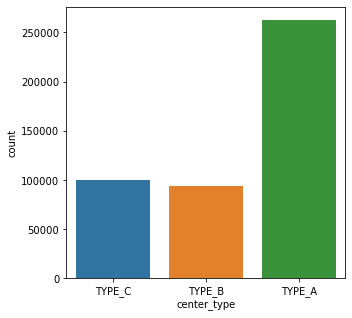

In [24]:

plt.figure(figsize=(5,5))
sns.countplot(x='center_type',data=train)

In [25]:
train['category'].value_counts()

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

<AxesSubplot:title={'center':'Bar Plot of Counts in category'}, xlabel='category', ylabel='count'>

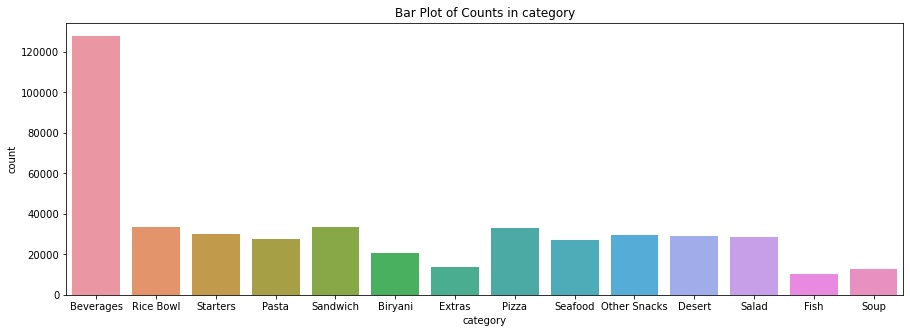

In [26]:
plt.figure(figsize=(15,5))
plt.title('Bar Plot of Counts in category')
sns.countplot(x='category',data=train)

In [27]:
train['cuisine'].value_counts()

Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64

<AxesSubplot:xlabel='cuisine', ylabel='count'>

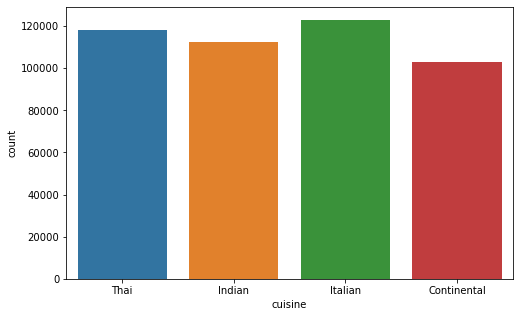

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x='cuisine',data=train)


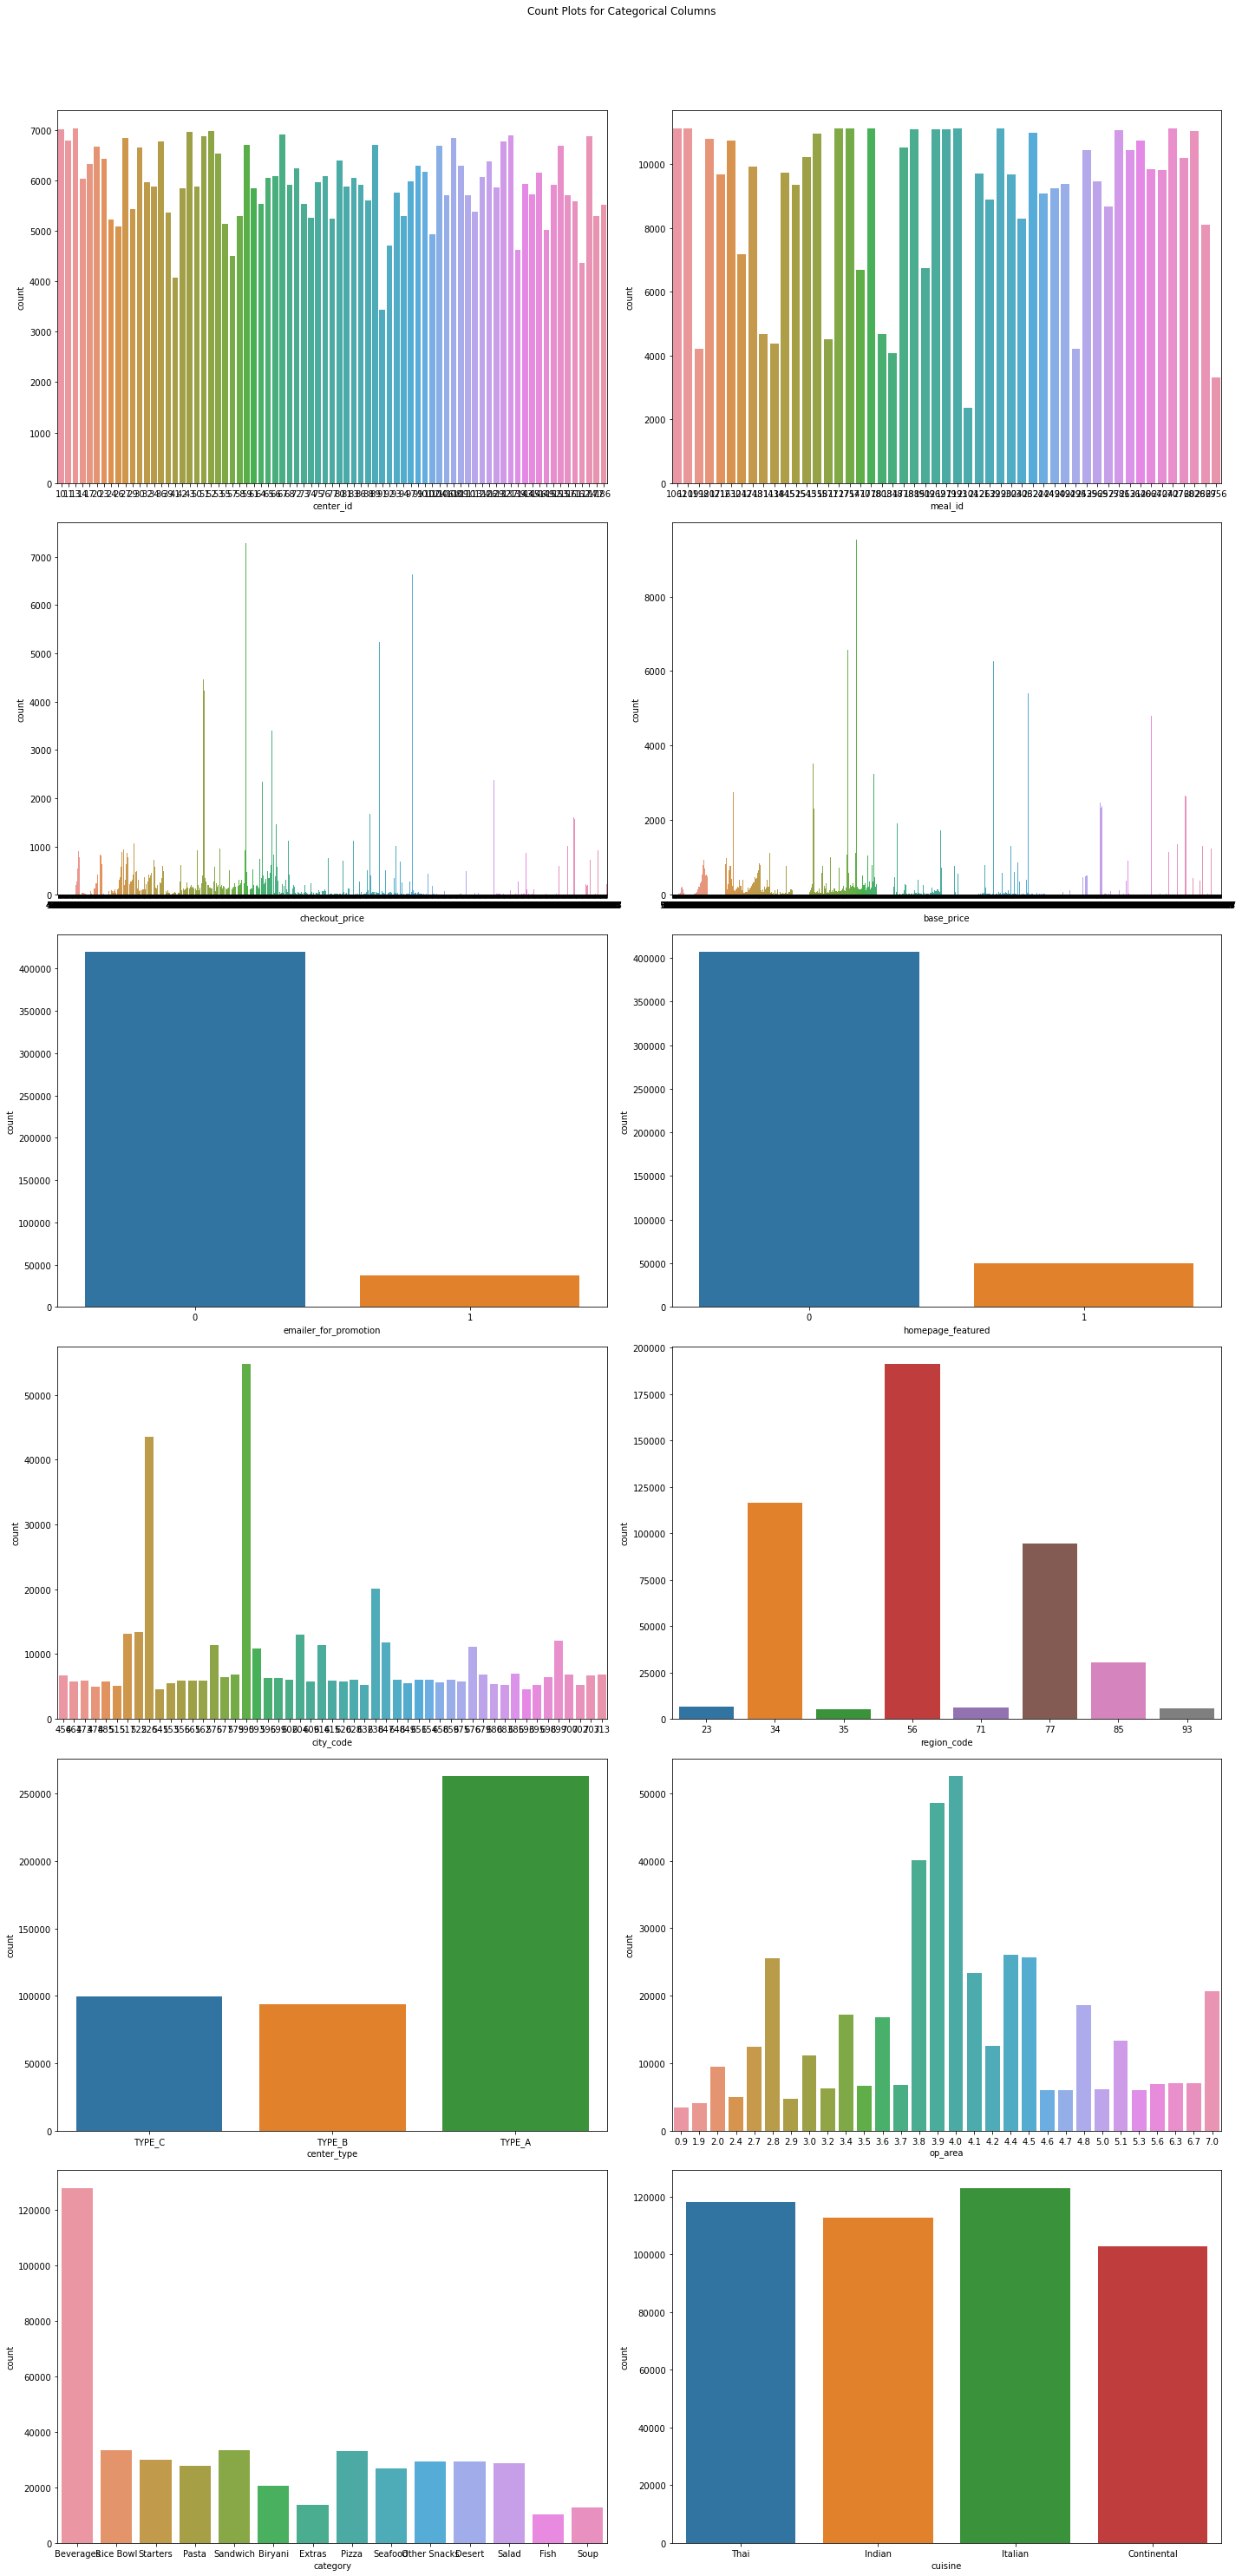

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_columns = [ 'center_id', 'meal_id', 'checkout_price' ,'base_price', 'emailer_for_promotion'
                       ,'homepage_featured' ,'city_code', 'region_code','center_type', 'op_area' ,'category' ,'cuisine']  # Add other categorical column names if needed
num_rows = len(categorical_columns) // 2 + len(categorical_columns) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))
fig.suptitle('Count Plots for Categorical Columns', y=1.03)

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=column, data=train, ax=axes[row, col])

plt.tight_layout()
plt.show()


# EDA num_orders Counts in categore

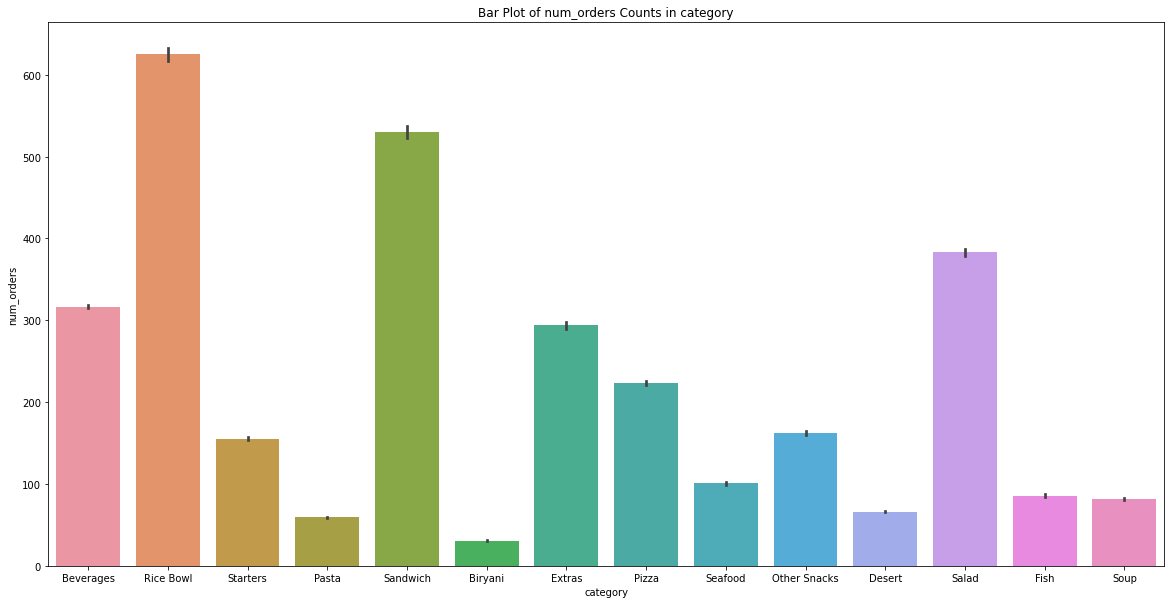

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
#subset_df = train.iloc[10:200000, :]

# Set the figure size
plt.figure(figsize=(20, 10))
sns.barplot(x='category', y='num_orders', data=train)
plt.title('Bar Plot of num_orders Counts in category')
plt.show()



# num_orders Counts in week

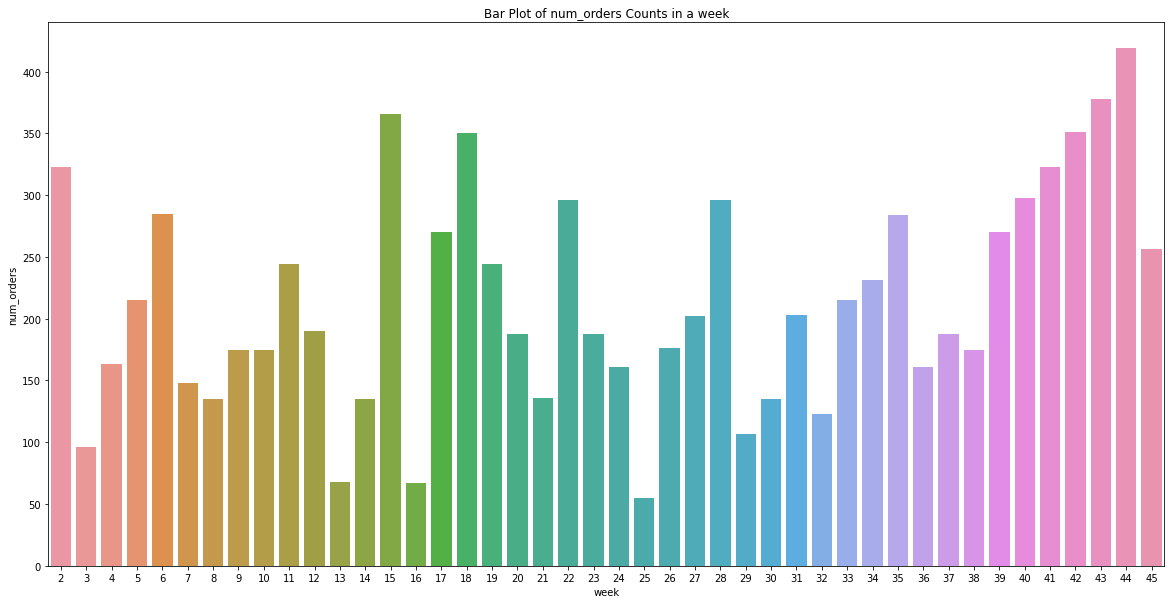

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
subset_df = train.iloc[1:45, :]

# Set the figure size
plt.figure(figsize=(20, 10))
sns.barplot(x='week', y='num_orders', data=subset_df)
plt.title('Bar Plot of num_orders Counts in a week')
plt.show()


# num_orders Counts in cuisine


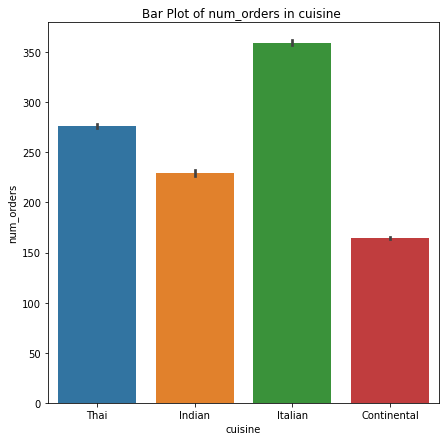

In [32]:
plt.figure(figsize=(7,7))
sns.barplot(x='cuisine', y='num_orders', data=train)
plt.title('Bar Plot of num_orders in cuisine ')
plt.show()


# num_orders Counts in center_type

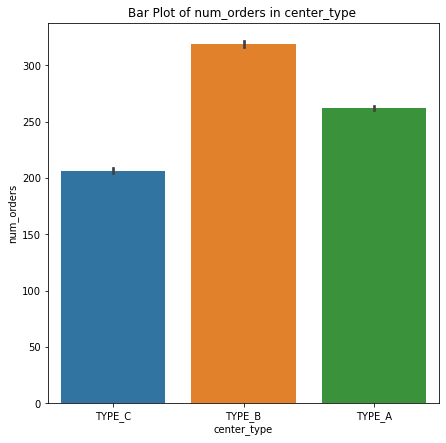

In [33]:
plt.figure(figsize=(7,7))
sns.barplot(x='center_type', y='num_orders', data=train)
plt.title('Bar Plot of num_orders in center_type ')
plt.show()

# num_orders Counts in center_id

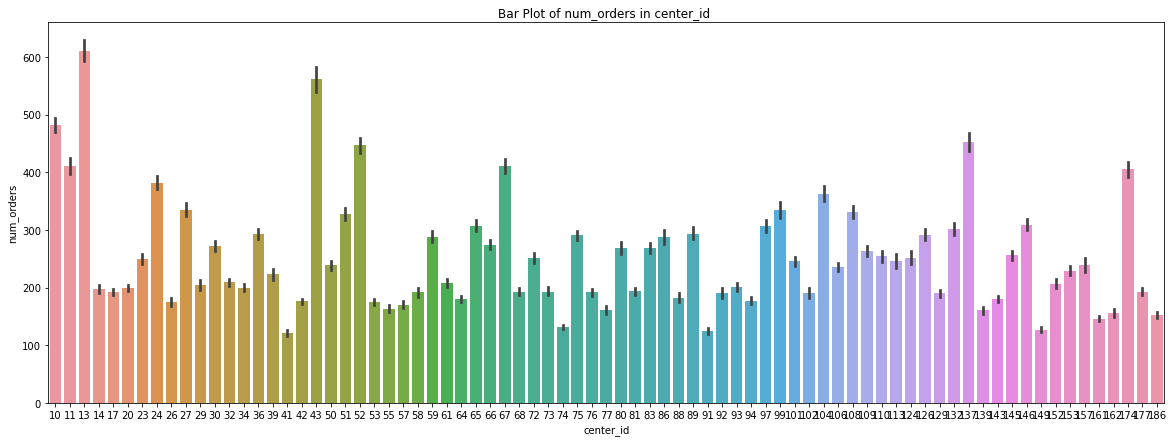

In [34]:
plt.figure(figsize=(20,7))
sns.barplot(x='center_id', y='num_orders', data=train)
plt.title('Bar Plot of num_orders in center_id ')
plt.show()

# num_orders Counts in meal_id

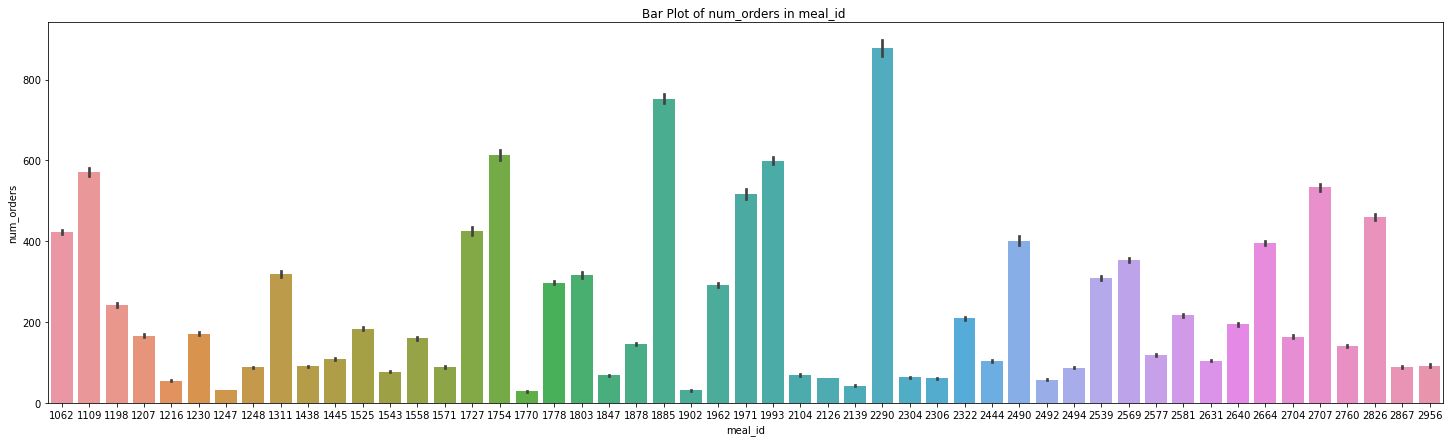

In [35]:
plt.figure(figsize=(25,7))
sns.barplot(x='meal_id', y='num_orders', data=train)
plt.title('Bar Plot of num_orders in meal_id ')
plt.show()

In [36]:
train['emailer_for_promotion'].value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

In [37]:
train


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


In [38]:
from sklearn.preprocessing  import LabelEncoder
label_encoder = LabelEncoder()
train['category'] = label_encoder.fit_transform(train['category'] )
train['cuisine'] = label_encoder.fit_transform(train['cuisine'] )
train['center_type'] = label_encoder.fit_transform(train['center_type'] )

In [39]:
train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,0,4.5,4,0
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,0,4.5,4,0
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,0,4.5,4,0
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,0,4.5,4,0


In [40]:
#train.set_index('week',inplace=True)

In [41]:
#train = train.drop('id', axis=1)
#train

In [42]:
#train['num_orders'].plot(figsize=(20,4))

In [43]:
subset_df = train.iloc[10:21, :]
subset_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
10,1047565,11,55,1885,146.53,144.53,0,0,244,647,56,2,2.0,0,3
11,1282497,12,55,1885,145.53,146.53,0,0,190,647,56,2,2.0,0,3
12,1136216,13,55,1885,145.50,146.50,0,0,68,647,56,2,2.0,0,3
13,1196793,14,55,1885,142.62,141.62,0,0,135,647,56,2,2.0,0,3
14,1324644,15,55,1885,117.37,143.62,0,0,366,647,56,2,2.0,0,3
15,1239157,16,55,1885,117.37,141.62,0,0,67,647,56,2,2.0,0,3
16,1056819,17,55,1885,122.28,143.62,0,0,270,647,56,2,2.0,0,3
17,1278127,18,55,1885,120.28,142.62,0,0,350,647,56,2,2.0,0,3
18,1027349,19,55,1885,120.28,143.62,0,0,244,647,56,2,2.0,0,3
19,1466073,20,55,1885,121.28,142.62,0,0,188,647,56,2,2.0,0,3


# compare category and num_orders